# 2D Burgers Equation

$$ \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = \nu \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right) $$

$$ \frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} = \nu \left( \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right) $$

Initial Condition
$$ u(x,y), v(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases} $$

Boundary Conditions
$$ u, v =1 ~on \begin{cases}
\begin{matrix}
x=0, x=2 \cr
y=0, y=2\end{matrix}\end{cases} $$

Text(0.5, 0, 'u')

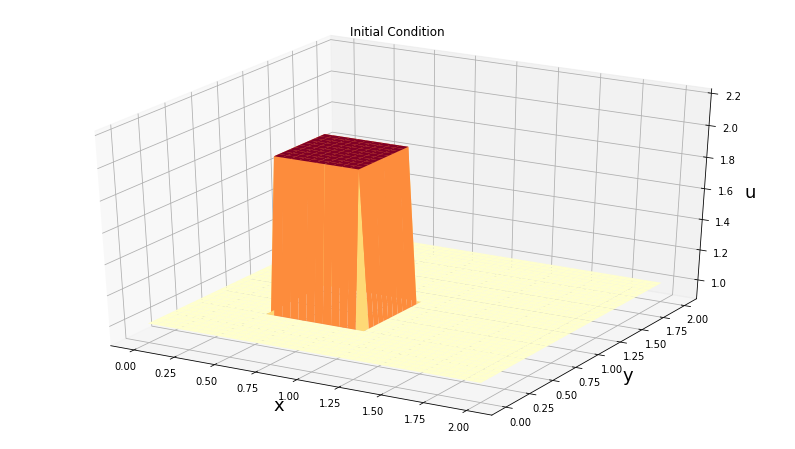

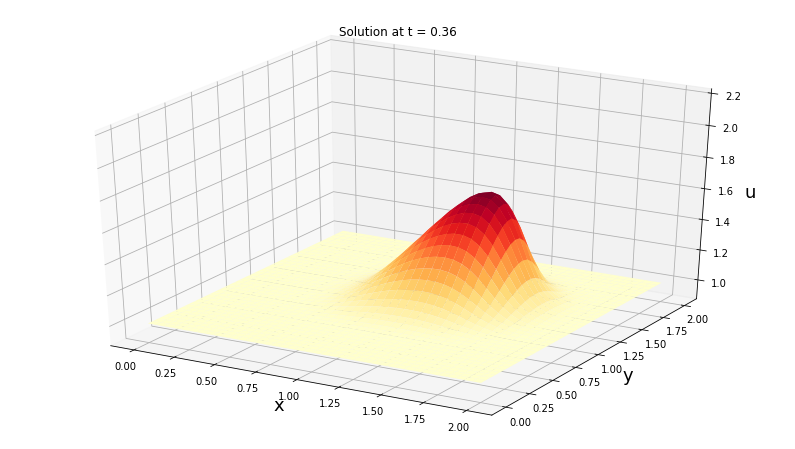

In [38]:
# Solution by finite difference method
# forward in time 
# central differencing for second order derivatives

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation
from IPython.display import Video

# domain limits
x_start, x_end = 0, 2
y_start, y_end = 0, 2

# number of grid points
nodes_x = 41
nodes_y = 41
steps_t = 1600

sigma = 0.0009
nu = 0.01

# step sizes
dx = (x_end - x_start)/(nodes_x - 1)
dy = (y_end - y_start)/(nodes_y - 1)
dt = sigma * dx * dy / nu


# generate grid
x = np.linspace(x_start, x_end, nodes_x)
y = np.linspace(x_start, x_end, nodes_y)
X, Y = np.meshgrid(x, y)

# initialize solution matrix
U1 = np.ones(np.shape(X)) # at time step n
V1 = np.ones(np.shape(X))
U2 = U1.copy()   # at time step n+1
V2 = V1.copy()

# set up matrix U to store full solution for each time step
dim = list(np.shape(X))
dim.append(steps_t)
U = np.ones(dim)
V = np.ones(dim)

# set initial conditions
U1[np.int(0.5/dx):np.int(1/dx + 1), np.int(0.5/dy):np.int(1/dy + 1)] = 2
V1[np.int(0.5/dx):np.int(1/dx + 1), np.int(0.5/dy):np.int(1/dy + 1)] = 2
U0 = U1.copy()
V0 = V1.copy()
U[:,:,0] = U0.copy()
V[:,:,0] = V0.copy()

# set-up for transient plot animation
fig  = plt.figure(figsize=[14, 8])
ax   = fig.add_subplot(1,1,1, projection='3d')
ax.set_zlim(0.9, 2.2)
ax.set_title("Initial Condition")
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.set_zlabel("u", fontsize=18)
surf = ax.plot_surface(X, Y, U0, cmap='YlOrRd') 

# solve finite difference equations
for n in range(1, steps_t):
    
    # solving equation 1
    U2 = U1.copy()
    U2[1:-1, 1:-1] -= (dt/dx) * U1[1:-1, 1:-1] * (U1[1:-1, 1:-1] - U1[1:-1, 0:-2])
    U2[1:-1, 1:-1] -= (dt/dy) * V1[1:-1, 1:-1] * (U1[1:-1, 1:-1] - U1[0:-2, 1:-1])
    U2[1:-1, 1:-1] += (nu * dt / dx**2) * (U1[1:-1, 2:] - 2*U1[1:-1, 1:-1] + U1[1:-1, 0:-2])
    U2[1:-1, 1:-1] += (nu * dt / dy**2) * (U1[2:, 1:-1] - 2*U1[1:-1, 1:-1] + U1[0:-2, 1:-1])
    U1 = U2.copy()
    
    # solving equation 2
    V2 = V1.copy()
    V2[1:-1, 1:-1] -= (dt/dx) * U1[1:-1, 1:-1] * (V1[1:-1, 1:-1] - V1[1:-1, 0:-2])
    V2[1:-1, 1:-1] -= (dt/dy) * V1[1:-1, 1:-1] * (V1[1:-1, 1:-1] - V1[0:-2, 1:-1])
    V2[1:-1, 1:-1] += (nu * dt / dx**2) * (V1[1:-1, 2:] - 2*V1[1:-1, 1:-1] + V1[1:-1, 0:-2])
    V2[1:-1, 1:-1] += (nu * dt / dy**2) * (V1[2:, 1:-1] - 2*V1[1:-1, 1:-1] + V1[0:-2, 1:-1])
    V1 = V2.copy()
    
    # recording U transient solution
    U[:, :, n] = U2
    

# plot final condition
fig_n  = plt.figure(figsize=[14, 8])
ax_n   = fig_n.add_subplot(1,1,1, projection='3d')
surf_n = ax_n.plot_surface(X, Y, U[:,:,steps_t-1], cmap='YlOrRd')    
ax_n.set_zlim(0.9, 2.2)
ax_n.set_title("Solution at t = {}".format(round(dt*steps_t,2)))
ax_n.set_xlabel("x", fontsize=18)
ax_n.set_ylabel("y", fontsize=18)
ax_n.set_zlabel("u", fontsize=18)

In [44]:
# create animation of the solution
skip=3
def animate(n):
    ax.clear()
    ax.set_title("Burgers Equation")
    ax.text(1.8, 1.8, 2, "t = {}".format(round(dt*n,2)))
    ax.set_xlabel("x", fontsize=18)
    ax.set_ylabel("y", fontsize=18)
    ax.set_zlabel("u", fontsize=18)
    ax.set_zlim(0.9, 2.2)
    surf = ax.plot_surface(X, Y, U[:,:,1 + skip*(n-1)], cmap='YlOrRd') 
    return surf

ani = animation.FuncAnimation(fig, animate, interval=25, save_count=int(steps_t/skip))

# supress static figure from being plotted
plt.close()

ani.save("2D_BurgersEq.mp4") # save as mp4
Video("2D_BurgersEq.mp4")    # display video in console

In [43]:
j = 47/3
j


15.666666666666666